In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({'movie':['a','b','c','a','b','c','a','b','c'],
                  'rating':[9,7,6,9,5,7,8,9,5]})

In [3]:
df.mean()

C:\Users\HP\AppData\Local\Temp/ipykernel_10480/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


rating    7.222222
dtype: float64

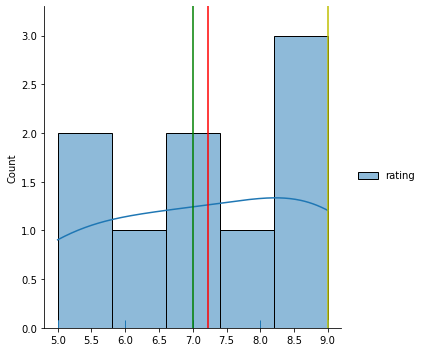

In [6]:
sns.displot(df,kde=True,rug=True)
plt.axvline(np.mean(df.rating),color='r',linestyle='-')
plt.axvline(np.median(df.rating),color='g',linestyle='-')
plt.axvline(df.rating.mode().values[0],color='y',linestyle='-')

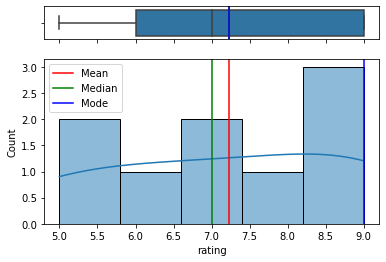

In [8]:
f,(ax_box,ax_hist) = plt.subplots(2,sharex=True,gridspec_kw={'height_ratios':(0.2,1)})
mean = np.mean(df.rating)
median = np.median(df.rating)
mode = df.rating.mode().values[0]

sns.boxplot(data=df,x='rating',ax=ax_box)
ax_box.axvline(mean,color='r',linestyle='-')
ax_box.axvline(mean,color='g',linestyle='-')
ax_box.axvline(mean,color='b',linestyle='-')

sns.histplot(data=df,x='rating',ax=ax_hist,kde=True)
ax_hist.axvline(mean,color='r',linestyle='-',label='Mean')
ax_hist.axvline(median,color='g',linestyle='-',label='Median')
ax_hist.axvline(mode,color='b',linestyle='-',label='Mode')

ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

In [9]:
#variance - measures how far each number in a dataset is from the mean
#standard deviation is the measure of the average distance between the values of the data in the dataset and the mean
#a low sd means the data points tend to be very close to the data points and the mean
#a high sd means the data points are spread over a large range of values

In [10]:
df.rating.var()

2.6944444444444446

In [11]:
df.rating.std()

1.6414763002993509

In [13]:
mean = df.groupby(['movie'])['rating'].mean()
stdn = df.groupby(['movie'])['rating'].std()
print(mean)
print(stdn)

movie
a    8.666667
b    7.000000
c    6.000000
Name: rating, dtype: float64
movie
a    0.57735
b    2.00000
c    1.00000
Name: rating, dtype: float64


<AxesSubplot:xlabel='movie'>

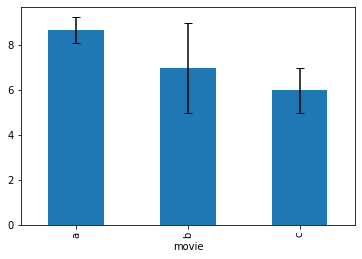

In [15]:
fig,ax=plt.subplots()
mean.plot.bar(yerr=stdn,ax=ax,capsize=4)

In [16]:
#population refers to the entire possible set of all that items within a field of focus. eg- citizen of a country
#sample refers to only a selected portion

In [17]:
df1 = pd.DataFrame({'pop_sample':range(20)})


In [19]:
df1.sample(5).mean()

pop_sample    9.2
dtype: float64

In [20]:
df1.sample(10).mean()

pop_sample    10.1
dtype: float64

In [21]:
from scipy import stats
stats.sem(df1)

array([1.32287566])

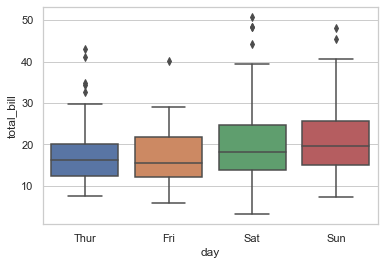

In [22]:
df2 = sns.load_dataset('tips')
sns.set_theme(style='whitegrid')
ax=sns.boxplot(x='day',y='total_bill',data=df2)

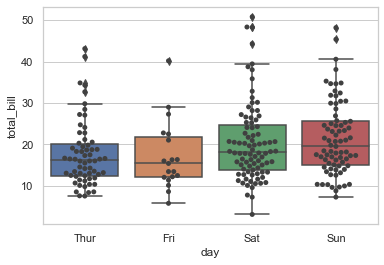

In [24]:
#interquartile range
ax=sns.boxplot(x='day',y='total_bill',data=df2)
ax=sns.swarmplot(x='day',y='total_bill',data=df2,color='0.25')

In [25]:
print(df2['total_bill'].quantile([0.05,0.25,0.5,0.75]))

0.05     9.5575
0.25    13.3475
0.50    17.7950
0.75    24.1275
Name: total_bill, dtype: float64


In [26]:
print(df2['total_bill'].quantile(0.75)-df2['total_bill'].quantile(0.25))

10.779999999999998


In [ ]:
#Co-relation- it is the statistical measure that expresses the extend to which two varible are linearly
#related, meaning the change together at a constant rate.

In [27]:
df3 = sns.load_dataset('iris')

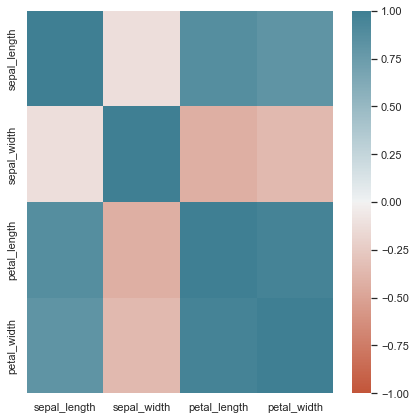

In [28]:
fig,ax=plt.subplots(figsize=(6,6))
ax=sns.heatmap(df3.corr(),vmin=-1,vmax=1,
              cmap=sns.diverging_palette(20,220,as_cmap=True),ax=ax)
plt.tight_layout()
plt.show()

In [29]:
#co-variance - how do random variable in a dataset will change together

#covariance is when two variable vary with each other whereas correlation is when the changing of
#one variable results in the change of another.

In [30]:
a=[11,12,22,11]
b=[7,8,9,10]
c=[10,11,22,23]
arr=np.array([a,b,c])

In [32]:
cov_matrix = np.cov(arr,bias=True)
cov_matrix

array([[21.5 ,  1.25, 13.75],
       [ 1.25,  1.25,  6.25],
       [13.75,  6.25, 36.25]])

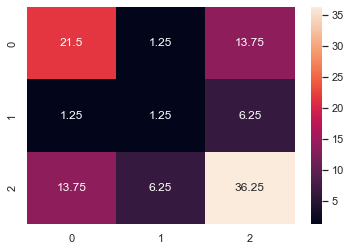

In [33]:
sns.heatmap(cov_matrix,annot=True,fmt='g')
plt.show()

In [ ]:
#Distribution
#1.Skewness = indicator of lack of symmetry that is both left and right sides of the curve are 
#unequal to the centre or the meanpoint.

In [34]:
df.skew()

C:\Users\HP\AppData\Local\Temp/ipykernel_10480/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


rating   -0.23507
dtype: float64

In [ ]:
#kurtosis is the measure of whether the data are heavy tailed or light tailed
#relative to the normal distribution

In [35]:
df.kurtosis()
#positive value = fatter tail
#negative - thinner tail

C:\Users\HP\AppData\Local\Temp/ipykernel_10480/615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


rating   -1.570351
dtype: float64

In [ ]:
'''
Normal distribution or the gaussian distrbution is the probability distribution that is 
symmetric around the mean showing that data near the mean are more frequent in occurence.
'''

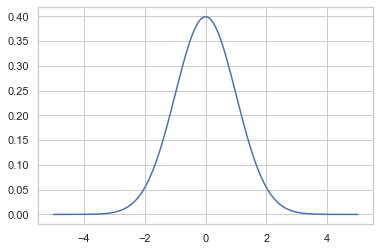

In [38]:
norm1 = np.arange(-5,5,0.001)
mean=0.0
std=1.0
pdf=stats.norm.pdf(norm1,mean,std)
plt.plot(norm1,pdf)
plt.show()

((array([-2.60376328, -2.283875  , -2.1005573 , -1.96875864, -1.86428437,
         -1.77691182, -1.70131573, -1.63435332, -1.57400778, -1.51890417,
         -1.46806125, -1.42075308, -1.37642684, -1.33465133, -1.29508341,
         -1.25744533, -1.22150891, -1.18708433, -1.15401181, -1.12215558,
         -1.0913992 , -1.06164202, -1.03279638, -1.00478546, -0.97754152,
         -0.95100448, -0.92512081, -0.89984257, -0.87512664, -0.85093408,
         -0.8272296 , -0.80398107, -0.78115919, -0.75873709, -0.73669013,
         -0.71499557, -0.69363244, -0.67258128, -0.65182406, -0.63134396,
         -0.61112532, -0.59115349, -0.57141472, -0.55189613, -0.53258558,
         -0.51347162, -0.49454346, -0.47579085, -0.45720409, -0.43877397,
         -0.4204917 , -0.40234892, -0.38433762, -0.36645016, -0.3486792 ,
         -0.33101768, -0.31345882, -0.29599609, -0.27862316, -0.26133393,
         -0.24412247, -0.22698303, -0.20991002, -0.19289797, -0.17594158,
         -0.15903562, -0.142175  , -0.

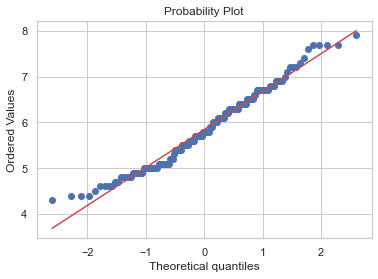

In [39]:
import pylab 
stats.probplot(df3.sepal_length,plot=pylab)

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

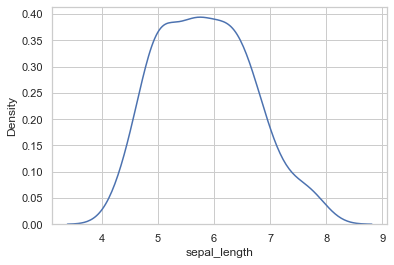

In [40]:
sns.kdeplot(df3.sepal_length)

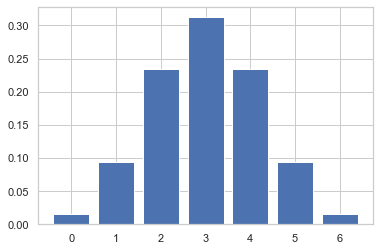

In [41]:
from scipy.stats import binom
n=6
p=0.5
r_val = list(range(n+1))
dist=[binom.pmf(r,n,p)for r in r_val]
plt.bar(r_val,dist)
plt.show()

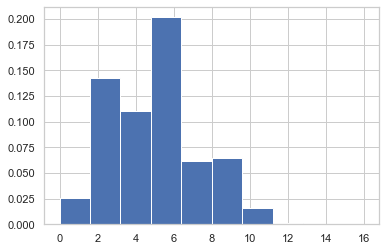

In [45]:
s = np.random.poisson(5,10000)
count,bins,ignored=plt.hist(s,10,density=True)
plt.show()

In [ ]:
#Central Limit Theorem
'''
this theorem states that given a sufficiently large sample size of a population
with the finite level of variance, the mean of all the samples from the same population
will be approximately equal to the mean of the total population for them.

CONFIDENCE INTERVAL
-> range of values around the statistics that are believed to contain with a certain probability.b
'''

In [46]:
import statsmodels.stats.api as sms
sms.DescrStatsW(df3.sepal_length).tconfint_mean()

(5.709732481507366, 5.976934185159301)

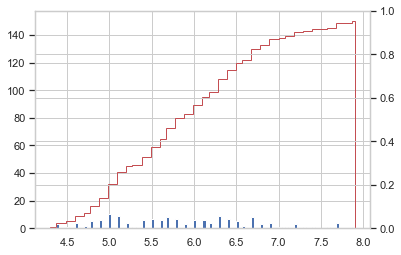

In [47]:
fig,ax= plt.subplots()
ax2=ax.twinx()
n,bins,patches=ax.hist(df3.sepal_length,bins=100)
n,bins,patches=ax.hist(df3.sepal_length,cumulative=1,histtype='step',bins=100,color='r')

(array([  9.,  32.,  46.,  73.,  89., 115., 133., 139., 144., 150.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 [<matplotlib.patches.Polygon at 0x1feaf073e50>])

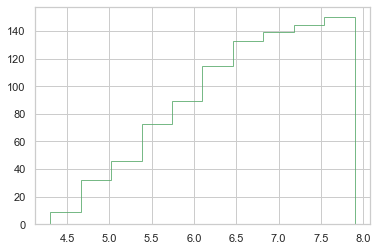

In [48]:
plt.hist(df3.sepal_length,cumulative=True,label='CDF',histtype='step',alpha=0.8,color='g')

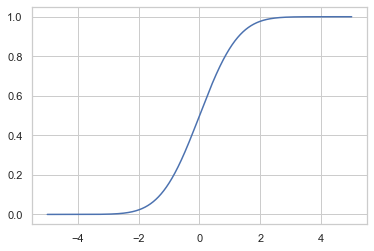

In [49]:
cdf=stats.norm.cdf(norm1)
plt.plot(norm1,cdf)
plt.show()

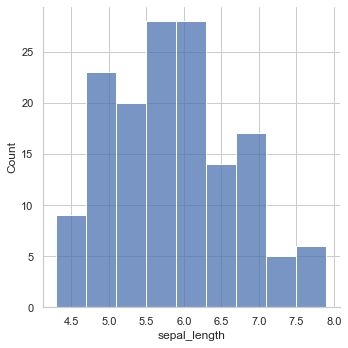

In [50]:
ax=sns.displot(df3.sepal_length)